In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series

In [23]:
house: DataFrame = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Boston.csv')
house

In [133]:
isNull: Series = house.isnull().sum()
print(isNull)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [134]:
features: DataFrame = house.drop(["MEDV"], axis=1)
target: Series = house["MEDV"]

# Normalization of data -> Z-score normalization
X_mean: Series = np.mean(features, axis=0)
X_std: Series = np.std(features, axis=0, ddof=0)
X_normalized: DataFrame = (features - X_mean) / X_std

y_mean: float = np.mean(target)
y_std: float = np.std(target)
y_normalized: Series = (target - y_mean) / y_std


X: DataFrame = X_normalized
y: Series = y_normalized

y.name = "MEDV"

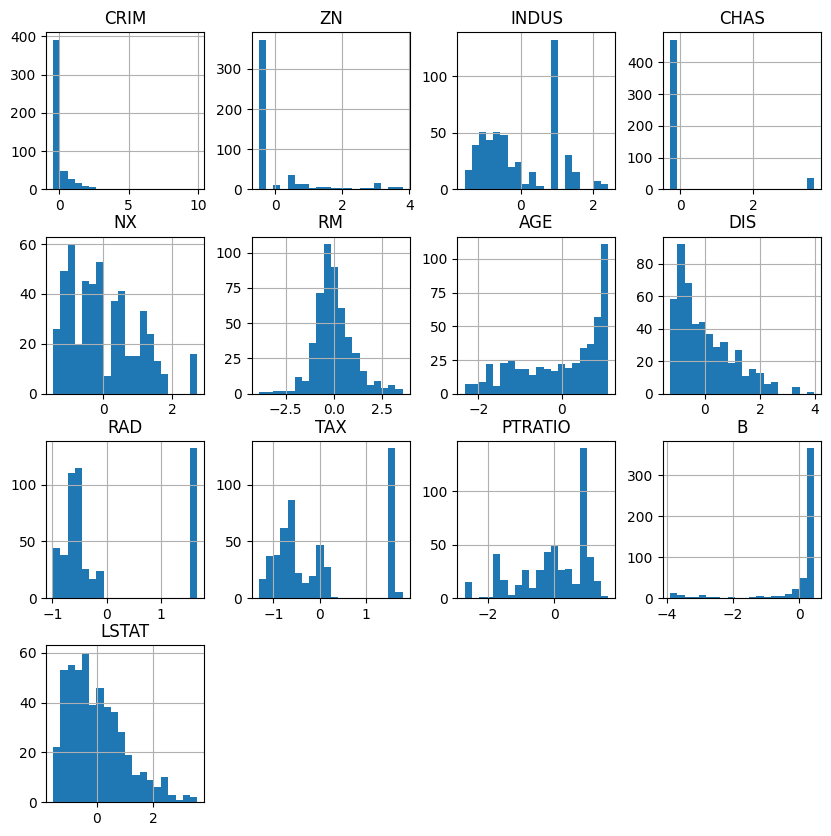

In [135]:
X.hist(bins=20, figsize=(10, 10))
# y.hist(bins=20, figsize=(5, 5))

plt.show()

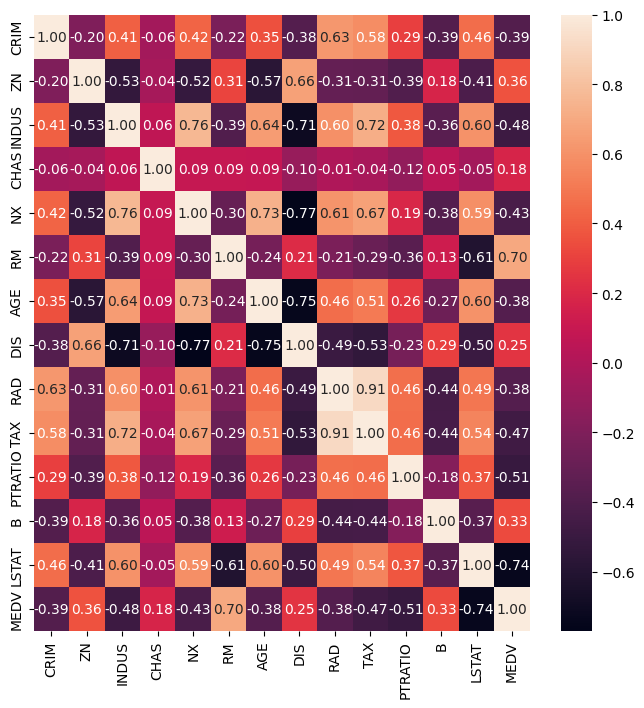

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NX        -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [136]:
# HeatMap
corr_mat = house.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr_mat, annot=True, fmt=".2f")
plt.show()

corr_mat.iloc[:-1, -1] # correlation of all features with MEDV

[-0.08328322  0.08487884 -0.0319936   0.08123695 -0.16380685  0.31797504
 -0.01252526 -0.29082731  0.14966481 -0.08889242 -0.21098037  0.09547918
 -0.39453973] -7.22978988929221e-16 9039952.493248252


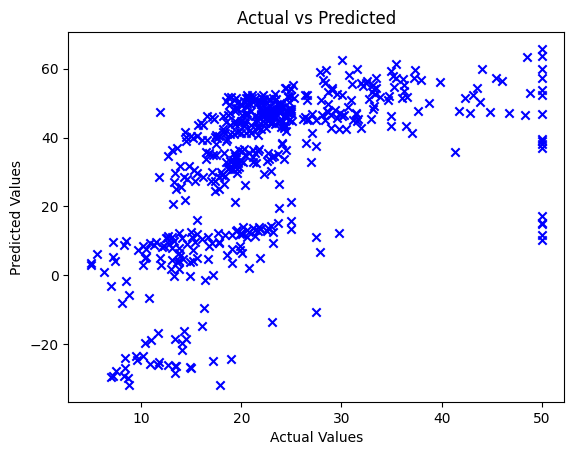

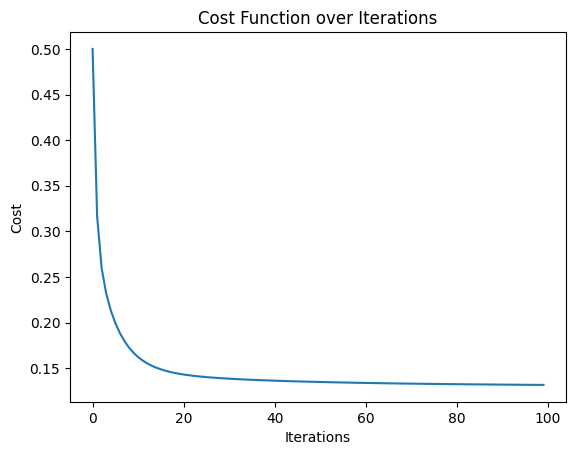

In [151]:
def calc_cost(x_train, y_train, w, b) -> float:
    m: int = len(x_train)
    cost: float = 0

    for i in range(m):
        f_wb = np.dot(x_train.iloc[i], w) + b
        cost += (f_wb - y_train[i]) ** 2

    cost /= 2 * m
    
    return cost

def calc_gradient(x_train, y_train, w, b):
    m: int = len(x_train)
    n: int = len(x_train.columns)
    diff_weight = np.zeros(n)
    diff_bias: float = 0
    cost: float = 0

    for i in range(m):
        f_wb: float = np.dot(x_train.iloc[i], w) + b
        difference: float = (f_wb - y_train[i])
        cost += difference * difference
        diff_bias += difference
        
        for j in range(n):
            diff_weight[j] += difference * x_train.iloc[i, j]

    diff_weight /= m
    diff_bias /= m
    cost /= 2 * m

    return diff_weight, diff_bias, cost

def gradient_descent(x_train, y_train, iterations: int, learning_rate: float):
    n: int = len(x_train.columns)

    weights = np.zeros(n)
    bias: float = 0
    cost = np.zeros(iterations)

    for i in range(iterations):
        diff_weights, diff_bias, curr_cost = calc_gradient(x_train, y_train, weights, bias)
        weights -= learning_rate * diff_weights
        bias -= learning_rate * diff_bias
        cost[i] = curr_cost

    return weights, bias, cost

def predict(features, weights, bias: float) -> float:
    return np.dot(weights, features) + bias

def test_gradient_descent(x_train, y_train):
    m: int = len(x_train)
    iterations: int = 100
    learning_rate: float = 0.09
    

    weights, bias, cost = gradient_descent(x_train, y_train, iterations, learning_rate)
    predicted = np.zeros(m)

    w_actual = weights * X_std
    b_actual = bias * y_std + y_mean - np.sum(weights * X_mean)
    print(weights, bias, calc_cost(features, target, w_actual, b_actual))

    for i in range(m):
        predicted[i] = predict(x_train.iloc[i], w_actual, b_actual)


    plt.scatter(target, predicted, c='b', marker='x')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted')
    plt.show()

    # Plot the cost function over iterations
    plt.plot(np.arange(iterations), cost)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function over Iterations')
    plt.show()

test_gradient_descent(X, y)